In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
! pip install missingno
import missingno as mno
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv("../input/bluebook-for-bulldozers/TrainAndValid.csv",parse_dates=['saledate'])

In [5]:
df.shape

(412698, 53)

In [6]:
df.sample(10).transpose()

,272701,118905,376989,252058,87321,133845,157990,41709,21416,248915
SalesID,1814288,1459626,2753256,1767707,1391523,1490992,1564687,1282184,1213305,1762329
SalePrice,6250.0,12500.0,80000.0,26000.0,38500.0,42000.0,57000.0,17500.0,12000.0,70000.0
MachineID,1447297,1080585,1806932,1428492,1146080,732321,929162,1162644,1036646,1331148
ModelID,9569,7428,18230,583,7008,1229,1188,3170,17311,492
datasource,132,132,149,132,132,132,132,132,121,132
auctioneerID,2.0,1.0,2.0,7.0,4.0,7.0,8.0,1.0,3.0,6.0
YearMade,2000,1974,2006,1996,1978,1994,2004,1989,2005,1989
MachineHoursCurrentMeter,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1751.0,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN
saledate,2006-08-23 00:00:00,1999-08-25 00:00:00,2011-06-03 00:00:00,2001-09-06 00:00:00,1989-02-01 00:00:00,2006-03-08 00:00:00,2010-05-26 00:00:00,2002-06-12 00:00:00,2011-07-21 00:00:00,1996-10-15 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [38]:
# numerical variables
nums=df.describe().T

In [40]:
numcols=nums.index.tolist()
print(numcols)
print("There are",len(nums),"numerical variables")


['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter']
There are 8 numerical variables


In [41]:
# categorical variables
cats=df.describe(include=["O"]).T

In [42]:
catcols = cats.index.tolist()
print(catcols)
print(len(catcols))

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
44


**DATA PREPROCESSING**
* Data is of mixed data types
* Date is already chaned to datetime 
* There are 8 numerical variables, 44 categorical variables
* Sale Price is the target variable


****

In [84]:
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()*100 / df.shape[0], columns =["Percentage of null values"])
null_columns["Total Nan Values"]=df[df.columns[df.isnull().any()]].isnull().sum()
# null_columns=null_columns.sort_values(by=['Percentage of null values'])
null_columns

,Percentage of null values,Total Nan Values
auctioneerID,4.879113,20136
MachineHoursCurrentMeter,64.258610,265194
UsageBand,82.149174,339028
fiSecondaryDesc,34.099269,140727
fiModelSeries,85.784520,354031
fiModelDescriptor,81.871490,337882
ProductSize,52.485110,216605
Drive_System,74.051970,305611
Enclosure,0.080931,334
Forks,52.092087,214983


* More than 5% is missing for every column
* Only 1 column has < 1 % missing , the other has 4.8% missing
* CCA on Enclosure column, Impute auctioneer ID

In [82]:
# make a list of all the null columns
null_cols = null_columns.index.tolist()
print(null_cols)

['Enclosure', 'auctioneerID', 'Hydraulics', 'fiSecondaryDesc', 'Coupler', 'Forks', 'ProductSize', 'Transmission', 'Ride_Control', 'MachineHoursCurrentMeter', 'Drive_System', 'Ripper', 'Undercarriage_Pad_Width', 'Thumb', 'Pattern_Changer', 'Stick_Length', 'Grouser_Type', 'Track_Type', 'Tire_Size', 'Travel_Controls', 'Blade_Type', 'Stick', 'Turbocharged', 'Pad_Type', 'Backhoe_Mounting', 'fiModelDescriptor', 'UsageBand', 'Differential_Type', 'Steering_Controls', 'fiModelSeries', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Scarifier', 'Tip_Control', 'Pushblock', 'Engine_Horsepower', 'Enclosure_Type', 'Blade_Width', 'Blade_Extension']


<AxesSubplot:>

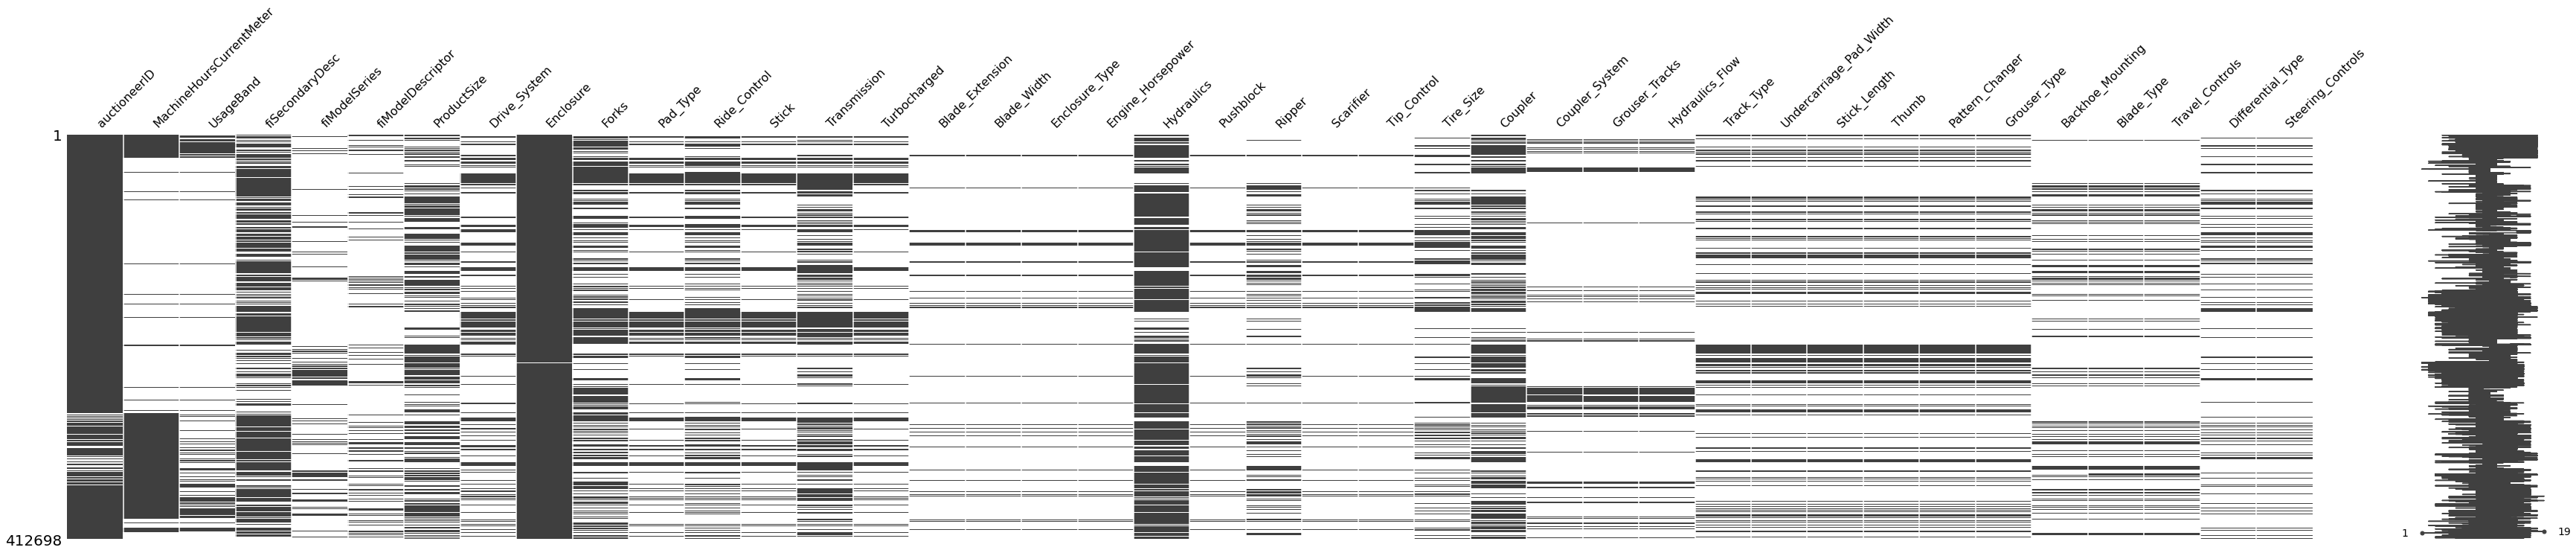

In [80]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

<AxesSubplot:>

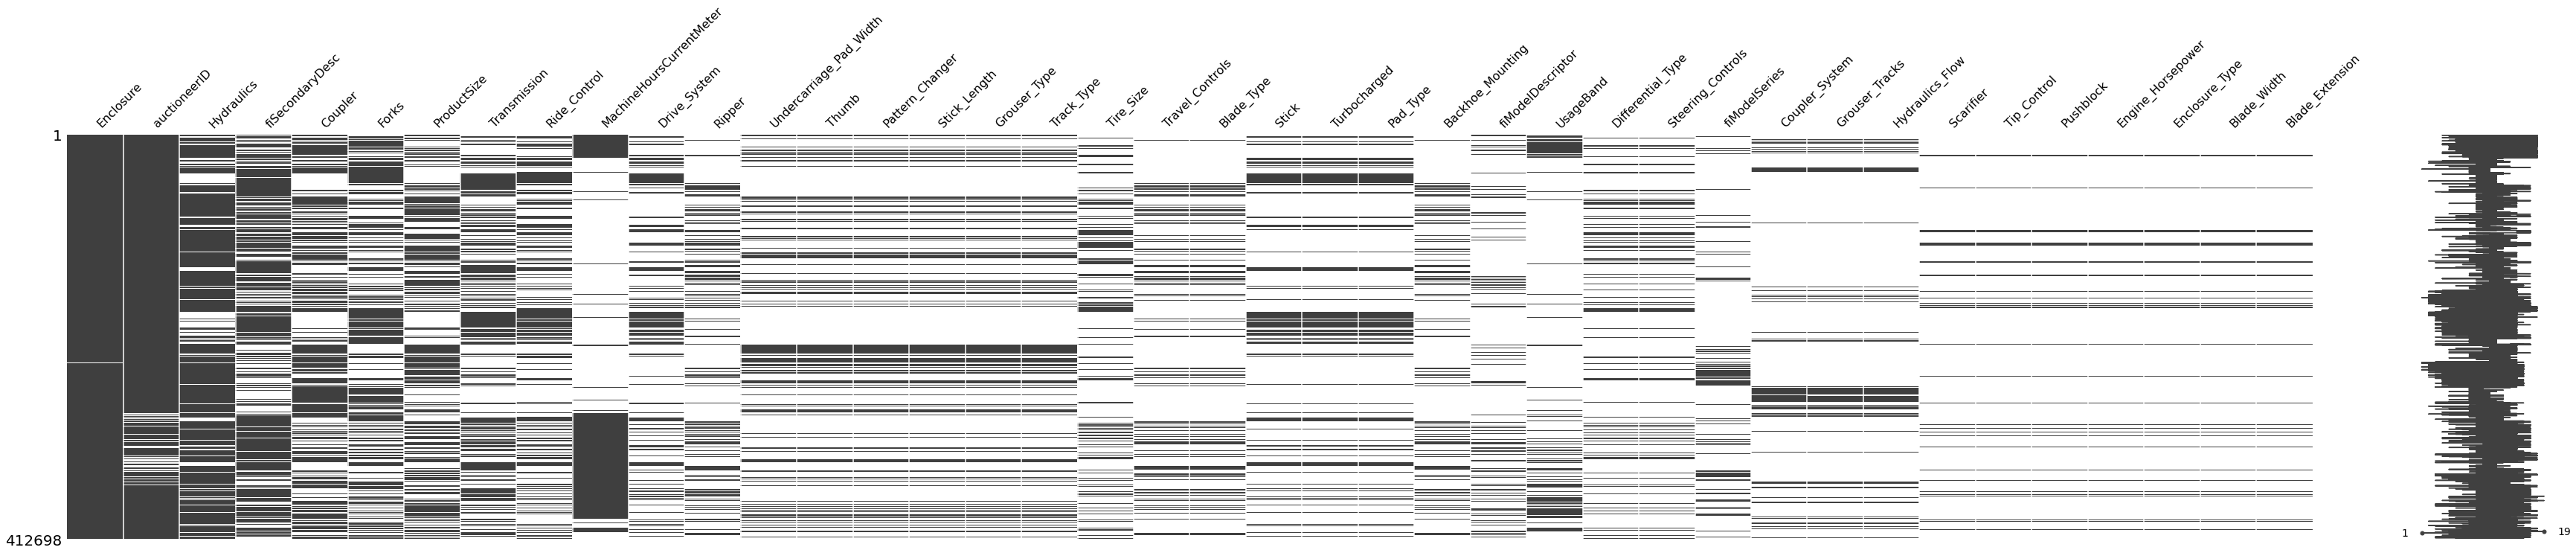

In [76]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

**MCAR**
1. Enclosure (<1%)
**MNAR**
1. 
* Undercarriage_Pad_Width
* Thumb
* Pattern_Changer
* Stick_Length
* Grouser_Type
* Track_Type
2. 
* Travel_Controls
* Blade_Type
* Backhoe_Mounting
3.
* Stick
* Turbocharged
* Pad_Type
4. 
* Differential_Type
* Steering_Controls
5. 
* Coupler_System
* Grouser_Tracks
* Hydraulics_Flow
6. 
* Scarifier
* Tip_Control
* Pushblock
* Engine_Horsepower
* Enclosure_Type
* Blade_Width
* Blade_Extension



